In [4]:
# Inspiration:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
# https://www.otexts.org/fpp/8/1

from pandas import read_csv
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from pandas import DateOffset
from datetime import datetime
from matplotlib import pyplot
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
pyplot.rcParams['figure.figsize'] = (17.0, 17.0)

In [6]:
TIME_SPAN = 5 #minutes        

In [7]:
def unix_parser(x):
    print(x)
    return datetime.fromtimestamp(int(x))

In [8]:
def days_to_num(days):
    '''Convert a number of days into a number of points in our data'''
    assert days >= 0
    
    return (days*24*60)//TIME_SPAN

m = days_to_num(1)    
m

288

In [9]:
def num_to_days(num):
    '''Convert a number of points in our data into a number of days'''
    assert num >= 0
    
    return (num*TIME_SPAN)/60/24

num_to_days(m)   

1.0

In [27]:
series = read_csv('../energyarima/benchmarks/fems20.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=unix_parser)

['1420066800' '1420067100' '1420067400' ..., '1433109000' '1433109300'
 '1433109600']
1420066800
1420067100
1420067400
1420067700
1420068000
1420068300
1420068600
1420068900
1420069200
1420069500
1420069800
1420070100
1420070400
1420070700
1420071000
1420071300
1420071600
1420071900
1420072200
1420072500
1420072800
1420073100
1420073400
1420073700
1420074000
1420074300
1420074600
1420074900
1420075200
1420075500
1420075800
1420076100
1420076400
1420076700
1420077000
1420077300
1420077600
1420077900
1420078200
1420078500
1420078800
1420079100
1420079400
1420079700
1420080000
1420080300
1420080600
1420080900
1420081200
1420081500
1420081800
1420082100
1420082400
1420082700
1420083000
1420083300
1420083600
1420083900
1420084200
1420084500
1420084800
1420085100
1420085400
1420085700
1420086000
1420086300
1420086600
1420086900
1420087200
1420087500
1420087800
1420088100
1420088400
1420088700
1420089000
1420089300
1420089600
1420089900
1420090200
1420090500
1420090800
1420091100
1420091400
1

1420451100
1420451400
1420451700
1420452000
1420452300
1420452600
1420452900
1420453200
1420453500
1420453800
1420454100
1420454400
1420454700
1420455000
1420455300
1420455600
1420455900
1420456200
1420456500
1420456800
1420457100
1420457400
1420457700
1420458000
1420458300
1420458600
1420458900
1420459200
1420459500
1420459800
1420460100
1420460400
1420460700
1420461000
1420461300
1420461600
1420461900
1420462200
1420462500
1420462800
1420463100
1420463400
1420463700
1420464000
1420464300
1420464600
1420464900
1420465200
1420465500
1420465800
1420466100
1420466400
1420466700
1420467000
1420467300
1420467600
1420467900
1420468200
1420468500
1420468800
1420469100
1420469400
1420469700
1420470000
1420470300
1420470600
1420470900
1420471200
1420471500
1420471800
1420472100
1420472400
1420472700
1420473000
1420473300
1420473600
1420473900
1420474200
1420474500
1420474800
1420475100
1420475400
1420475700
1420476000
1420476300
1420476600
1420476900
1420477200
1420477500
1420477800
1420478100

1421199600
1421199900
1421200200
1421200500
1421200800
1421201100
1421201400
1421201700
1421202000
1421202300
1421202600
1421202900
1421203200
1421203500
1421203800
1421204100
1421204400
1421204700
1421205000
1421205300
1421205600
1421205900
1421206200
1421206500
1421206800
1421207100
1421207400
1421207700
1421208000
1421208300
1421208600
1421208900
1421209200
1421209500
1421209800
1421210100
1421210400
1421210700
1421211000
1421211300
1421211600
1421211900
1421212200
1421212500
1421212800
1421213100
1421213400
1421213700
1421214000
1421214300
1421214600
1421214900
1421215200
1421215500
1421215800
1421216100
1421216400
1421216700
1421217000
1421217300
1421217600
1421217900
1421218200
1421218500
1421218800
1421219100
1421219400
1421219700
1421220000
1421220300
1421220600
1421220900
1421221200
1421221500
1421221800
1421222100
1421222400
1421222700
1421223000
1421223300
1421223600
1421223900
1421224200
1421224500
1421224800
1421225100
1421225400
1421225700
1421226000
1421226300
1421226600

1421653800
1421654100
1421654400
1421654700
1421655000
1421655300
1421655600
1421655900
1421656200
1421656500
1421656800
1421657100
1421657400
1421657700
1421658000
1421658300
1421658600
1421658900
1421659200
1421659500
1421659800
1421660100
1421660400
1421660700
1421661000
1421661300
1421661600
1421661900
1421662200
1421662500
1421662800
1421663100
1421663400
1421663700
1421664000
1421664300
1421664600
1421664900
1421665200
1421665500
1421665800
1421666100
1421666400
1421666700
1421667000
1421667300
1421667600
1421667900
1421668200
1421668500
1421668800
1421669100
1421669400
1421669700
1421670000
1421670300
1421670600
1421670900
1421671200
1421671500
1421671800
1421672100
1421672400
1421672700
1421673000
1421673300
1421673600
1421673900
1421674200
1421674500
1421674800
1421675100
1421675400
1421675700
1421676000
1421676300
1421676600
1421676900
1421677200
1421677500
1421677800
1421678100
1421678400
1421678700
1421679000
1421679300
1421679600
1421679900
1421680200
1421680500
1421680800

1422414300
1422414600
1422414900
1422415200
1422415500
1422415800
1422416100
1422416400
1422416700
1422417000
1422417300
1422417600
1422417900
1422418200
1422418500
1422418800
1422419100
1422419400
1422419700
1422420000
1422420300
1422420600
1422420900
1422421200
1422421500
1422421800
1422422100
1422422400
1422422700
1422423000
1422423300
1422423600
1422423900
1422424200
1422424500
1422424800
1422425100
1422425400
1422425700
1422426000
1422426300
1422426600
1422426900
1422427200
1422427500
1422427800
1422428100
1422428400
1422428700
1422429000
1422429300
1422429600
1422429900
1422430200
1422430500
1422430800
1422431100
1422431400
1422431700
1422432000
1422432300
1422432600
1422432900
1422433200
1422433500
1422433800
1422434100
1422434400
1422434700
1422435000
1422435300
1422435600
1422435900
1422436200
1422436500
1422436800
1422437100
1422437400
1422437700
1422438000
1422438300
1422438600
1422438900
1422439200
1422439500
1422439800
1422440100
1422440400
1422440700
1422441000
1422441300

1423120800
1423121100
1423121400
1423121700
1423122000
1423122300
1423122600
1423122900
1423123200
1423123500
1423123800
1423124100
1423124400
1423124700
1423125000
1423125300
1423125600
1423125900
1423126200
1423126500
1423126800
1423127100
1423127400
1423127700
1423128000
1423128300
1423128600
1423128900
1423129200
1423129500
1423129800
1423130100
1423130400
1423130700
1423131000
1423131300
1423131600
1423131900
1423132200
1423132500
1423132800
1423133100
1423133400
1423133700
1423134000
1423134300
1423134600
1423134900
1423135200
1423135500
1423135800
1423136100
1423136400
1423136700
1423137000
1423137300
1423137600
1423137900
1423138200
1423138500
1423138800
1423139100
1423139400
1423139700
1423140000
1423140300
1423140600
1423140900
1423141200
1423141500
1423141800
1423142100
1423142400
1423142700
1423143000
1423143300
1423143600
1423143900
1423144200
1423144500
1423144800
1423145100
1423145400
1423145700
1423146000
1423146300
1423146600
1423146900
1423147200
1423147500
1423147800

1423748400
1423748700
1423749000
1423749300
1423749600
1423749900
1423750200
1423750500
1423750800
1423751100
1423751400
1423751700
1423752000
1423752300
1423752600
1423752900
1423753200
1423753500
1423753800
1423754100
1423754400
1423754700
1423755000
1423755300
1423755600
1423755900
1423756200
1423756500
1423756800
1423757100
1423757400
1423757700
1423758000
1423758300
1423758600
1423758900
1423759200
1423759500
1423759800
1423760100
1423760400
1423760700
1423761000
1423761300
1423761600
1423761900
1423762200
1423762500
1423762800
1423763100
1423763400
1423763700
1423764000
1423764300
1423764600
1423764900
1423765200
1423765500
1423765800
1423766100
1423766400
1423766700
1423767000
1423767300
1423767600
1423767900
1423768200
1423768500
1423768800
1423769100
1423769400
1423769700
1423770000
1423770300
1423770600
1423770900
1423771200
1423771500
1423771800
1423772100
1423772400
1423772700
1423773000
1423773300
1423773600
1423773900
1423774200
1423774500
1423774800
1423775100
1423775400

1424500800
1424501100
1424501400
1424501700
1424502000
1424502300
1424502600
1424502900
1424503200
1424503500
1424503800
1424504100
1424504400
1424504700
1424505000
1424505300
1424505600
1424505900
1424506200
1424506500
1424506800
1424507100
1424507400
1424507700
1424508000
1424508300
1424508600
1424508900
1424509200
1424509500
1424509800
1424510100
1424510400
1424510700
1424511000
1424511300
1424511600
1424511900
1424512200
1424512500
1424512800
1424513100
1424513400
1424513700
1424514000
1424514300
1424514600
1424514900
1424515200
1424515500
1424515800
1424516100
1424516400
1424516700
1424517000
1424517300
1424517600
1424517900
1424518200
1424518500
1424518800
1424519100
1424519400
1424519700
1424520000
1424520300
1424520600
1424520900
1424521200
1424521500
1424521800
1424522100
1424522400
1424522700
1424523000
1424523300
1424523600
1424523900
1424524200
1424524500
1424524800
1424525100
1424525400
1424525700
1424526000
1424526300
1424526600
1424526900
1424527200
1424527500
1424527800

1425248700
1425249000
1425249300
1425249600
1425249900
1425250200
1425250500
1425250800
1425251100
1425251400
1425251700
1425252000
1425252300
1425252600
1425252900
1425253200
1425253500
1425253800
1425254100
1425254400
1425254700
1425255000
1425255300
1425255600
1425255900
1425256200
1425256500
1425256800
1425257100
1425257400
1425257700
1425258000
1425258300
1425258600
1425258900
1425259200
1425259500
1425259800
1425260100
1425260400
1425260700
1425261000
1425261300
1425261600
1425261900
1425262200
1425262500
1425262800
1425263100
1425263400
1425263700
1425264000
1425264300
1425264600
1425264900
1425265200
1425265500
1425265800
1425266100
1425266400
1425266700
1425267000
1425267300
1425267600
1425267900
1425268200
1425268500
1425268800
1425269100
1425269400
1425269700
1425270000
1425270300
1425270600
1425270900
1425271200
1425271500
1425271800
1425272100
1425272400
1425272700
1425273000
1425273300
1425273600
1425273900
1425274200
1425274500
1425274800
1425275100
1425275400
1425275700

1425863100
1425863400
1425863700
1425864000
1425864300
1425864600
1425864900
1425865200
1425865500
1425865800
1425866100
1425866400
1425866700
1425867000
1425867300
1425867600
1425867900
1425868200
1425868500
1425868800
1425869100
1425869400
1425869700
1425870000
1425870300
1425870600
1425870900
1425871200
1425871500
1425871800
1425872100
1425872400
1425872700
1425873000
1425873300
1425873600
1425873900
1425874200
1425874500
1425874800
1425875100
1425875400
1425875700
1425876000
1425876300
1425876600
1425876900
1425877200
1425877500
1425877800
1425878100
1425878400
1425878700
1425879000
1425879300
1425879600
1425879900
1425880200
1425880500
1425880800
1425881100
1425881400
1425881700
1425882000
1425882300
1425882600
1425882900
1425883200
1425883500
1425883800
1425884100
1425884400
1425884700
1425885000
1425885300
1425885600
1425885900
1425886200
1425886500
1425886800
1425887100
1425887400
1425887700
1425888000
1425888300
1425888600
1425888900
1425889200
1425889500
1425889800
1425890100

1426530300
1426530600
1426530900
1426531200
1426531500
1426531800
1426532100
1426532400
1426532700
1426533000
1426533300
1426533600
1426533900
1426534200
1426534500
1426534800
1426535100
1426535400
1426535700
1426536000
1426536300
1426536600
1426536900
1426537200
1426537500
1426537800
1426538100
1426538400
1426538700
1426539000
1426539300
1426539600
1426539900
1426540200
1426540500
1426540800
1426541100
1426541400
1426541700
1426542000
1426542300
1426542600
1426542900
1426543200
1426543500
1426543800
1426544100
1426544400
1426544700
1426545000
1426545300
1426545600
1426545900
1426546200
1426546500
1426546800
1426547100
1426547400
1426547700
1426548000
1426548300
1426548600
1426548900
1426549200
1426549500
1426549800
1426550100
1426550400
1426550700
1426551000
1426551300
1426551600
1426551900
1426552200
1426552500
1426552800
1426553100
1426553400
1426553700
1426554000
1426554300
1426554600
1426554900
1426555200
1426555500
1426555800
1426556100
1426556400
1426556700
1426557000
1426557300

1427203500
1427203800
1427204100
1427204400
1427204700
1427205000
1427205300
1427205600
1427205900
1427206200
1427206500
1427206800
1427207100
1427207400
1427207700
1427208000
1427208300
1427208600
1427208900
1427209200
1427209500
1427209800
1427210100
1427210400
1427210700
1427211000
1427211300
1427211600
1427211900
1427212200
1427212500
1427212800
1427213100
1427213400
1427213700
1427214000
1427214300
1427214600
1427214900
1427215200
1427215500
1427215800
1427216100
1427216400
1427216700
1427217000
1427217300
1427217600
1427217900
1427218200
1427218500
1427218800
1427219100
1427219400
1427219700
1427220000
1427220300
1427220600
1427220900
1427221200
1427221500
1427221800
1427222100
1427222400
1427222700
1427223000
1427223300
1427223600
1427223900
1427224200
1427224500
1427224800
1427225100
1427225400
1427225700
1427226000
1427226300
1427226600
1427226900
1427227200
1427227500
1427227800
1427228100
1427228400
1427228700
1427229000
1427229300
1427229600
1427229900
1427230200
1427230500

1427800500
1427800800
1427801100
1427801400
1427801700
1427802000
1427802300
1427802600
1427802900
1427803200
1427803500
1427803800
1427804100
1427804400
1427804700
1427805000
1427805300
1427805600
1427805900
1427806200
1427806500
1427806800
1427807100
1427807400
1427807700
1427808000
1427808300
1427808600
1427808900
1427809200
1427809500
1427809800
1427810100
1427810400
1427810700
1427811000
1427811300
1427811600
1427811900
1427812200
1427812500
1427812800
1427813100
1427813400
1427813700
1427814000
1427814300
1427814600
1427814900
1427815200
1427815500
1427815800
1427816100
1427816400
1427816700
1427817000
1427817300
1427817600
1427817900
1427818200
1427818500
1427818800
1427819100
1427819400
1427819700
1427820000
1427820300
1427820600
1427820900
1427821200
1427821500
1427821800
1427822100
1427822400
1427822700
1427823000
1427823300
1427823600
1427823900
1427824200
1427824500
1427824800
1427825100
1427825400
1427825700
1427826000
1427826300
1427826600
1427826900
1427827200
1427827500

1428561900
1428562200
1428562500
1428562800
1428563100
1428563400
1428563700
1428564000
1428564300
1428564600
1428564900
1428565200
1428565500
1428565800
1428566100
1428566400
1428566700
1428567000
1428567300
1428567600
1428567900
1428568200
1428568500
1428568800
1428569100
1428569400
1428569700
1428570000
1428570300
1428570600
1428570900
1428571200
1428571500
1428571800
1428572100
1428572400
1428572700
1428573000
1428573300
1428573600
1428573900
1428574200
1428574500
1428574800
1428575100
1428575400
1428575700
1428576000
1428576300
1428576600
1428576900
1428577200
1428577500
1428577800
1428578100
1428578400
1428578700
1428579000
1428579300
1428579600
1428579900
1428580200
1428580500
1428580800
1428581100
1428581400
1428581700
1428582000
1428582300
1428582600
1428582900
1428583200
1428583500
1428583800
1428584100
1428584400
1428584700
1428585000
1428585300
1428585600
1428585900
1428586200
1428586500
1428586800
1428587100
1428587400
1428587700
1428588000
1428588300
1428588600
1428588900

1429325400
1429325700
1429326000
1429326300
1429326600
1429326900
1429327200
1429327500
1429327800
1429328100
1429328400
1429328700
1429329000
1429329300
1429329600
1429329900
1429330200
1429330500
1429330800
1429331100
1429331400
1429331700
1429332000
1429332300
1429332600
1429332900
1429333200
1429333500
1429333800
1429334100
1429334400
1429334700
1429335000
1429335300
1429335600
1429335900
1429336200
1429336500
1429336800
1429337100
1429337400
1429337700
1429338000
1429338300
1429338600
1429338900
1429339200
1429339500
1429339800
1429340100
1429340400
1429340700
1429341000
1429341300
1429341600
1429341900
1429342200
1429342500
1429342800
1429343100
1429343400
1429343700
1429344000
1429344300
1429344600
1429344900
1429345200
1429345500
1429345800
1429346100
1429346400
1429346700
1429347000
1429347300
1429347600
1429347900
1429348200
1429348500
1429348800
1429349100
1429349400
1429349700
1429350000
1429350300
1429350600
1429350900
1429351200
1429351500
1429351800
1429352100
1429352400

1430045100
1430045400
1430045700
1430046000
1430046300
1430046600
1430046900
1430047200
1430047500
1430047800
1430048100
1430048400
1430048700
1430049000
1430049300
1430049600
1430049900
1430050200
1430050500
1430050800
1430051100
1430051400
1430051700
1430052000
1430052300
1430052600
1430052900
1430053200
1430053500
1430053800
1430054100
1430054400
1430054700
1430055000
1430055300
1430055600
1430055900
1430056200
1430056500
1430056800
1430057100
1430057400
1430057700
1430058000
1430058300
1430058600
1430058900
1430059200
1430059500
1430059800
1430060100
1430060400
1430060700
1430061000
1430061300
1430061600
1430061900
1430062200
1430062500
1430062800
1430063100
1430063400
1430063700
1430064000
1430064300
1430064600
1430064900
1430065200
1430065500
1430065800
1430066100
1430066400
1430066700
1430067000
1430067300
1430067600
1430067900
1430068200
1430068500
1430068800
1430069100
1430069400
1430069700
1430070000
1430070300
1430070600
1430070900
1430071200
1430071500
1430071800
1430072100

1430605500
1430605800
1430606100
1430606400
1430606700
1430607000
1430607300
1430607600
1430607900
1430608200
1430608500
1430608800
1430609100
1430609400
1430609700
1430610000
1430610300
1430610600
1430610900
1430611200
1430611500
1430611800
1430612100
1430612400
1430612700
1430613000
1430613300
1430613600
1430613900
1430614200
1430614500
1430614800
1430615100
1430615400
1430615700
1430616000
1430616300
1430616600
1430616900
1430617200
1430617500
1430617800
1430618100
1430618400
1430618700
1430619000
1430619300
1430619600
1430619900
1430620200
1430620500
1430620800
1430621100
1430621400
1430621700
1430622000
1430622300
1430622600
1430622900
1430623200
1430623500
1430623800
1430624100
1430624400
1430624700
1430625000
1430625300
1430625600
1430625900
1430626200
1430626500
1430626800
1430627100
1430627400
1430627700
1430628000
1430628300
1430628600
1430628900
1430629200
1430629500
1430629800
1430630100
1430630400
1430630700
1430631000
1430631300
1430631600
1430631900
1430632200
1430632500

1431252600
1431252900
1431253200
1431253500
1431253800
1431254100
1431254400
1431254700
1431255000
1431255300
1431255600
1431255900
1431256200
1431256500
1431256800
1431257100
1431257400
1431257700
1431258000
1431258300
1431258600
1431258900
1431259200
1431259500
1431259800
1431260100
1431260400
1431260700
1431261000
1431261300
1431261600
1431261900
1431262200
1431262500
1431262800
1431263100
1431263400
1431263700
1431264000
1431264300
1431264600
1431264900
1431265200
1431265500
1431265800
1431266100
1431266400
1431266700
1431267000
1431267300
1431267600
1431267900
1431268200
1431268500
1431268800
1431269100
1431269400
1431269700
1431270000
1431270300
1431270600
1431270900
1431271200
1431271500
1431271800
1431272100
1431272400
1431272700
1431273000
1431273300
1431273600
1431273900
1431274200
1431274500
1431274800
1431275100
1431275400
1431275700
1431276000
1431276300
1431276600
1431276900
1431277200
1431277500
1431277800
1431278100
1431278400
1431278700
1431279000
1431279300
1431279600

1432057500
1432057800
1432058100
1432058400
1432058700
1432059000
1432059300
1432059600
1432059900
1432060200
1432060500
1432060800
1432061100
1432061400
1432061700
1432062000
1432062300
1432062600
1432062900
1432063200
1432063500
1432063800
1432064100
1432064400
1432064700
1432065000
1432065300
1432065600
1432065900
1432066200
1432066500
1432066800
1432067100
1432067400
1432067700
1432068000
1432068300
1432068600
1432068900
1432069200
1432069500
1432069800
1432070100
1432070400
1432070700
1432071000
1432071300
1432071600
1432071900
1432072200
1432072500
1432072800
1432073100
1432073400
1432073700
1432074000
1432074300
1432074600
1432074900
1432075200
1432075500
1432075800
1432076100
1432076400
1432076700
1432077000
1432077300
1432077600
1432077900
1432078200
1432078500
1432078800
1432079100
1432079400
1432079700
1432080000
1432080300
1432080600
1432080900
1432081200
1432081500
1432081800
1432082100
1432082400
1432082700
1432083000
1432083300
1432083600
1432083900
1432084200
1432084500

1432748400
1432748700
1432749000
1432749300
1432749600
1432749900
1432750200
1432750500
1432750800
1432751100
1432751400
1432751700
1432752000
1432752300
1432752600
1432752900
1432753200
1432753500
1432753800
1432754100
1432754400
1432754700
1432755000
1432755300
1432755600
1432755900
1432756200
1432756500
1432756800
1432757100
1432757400
1432757700
1432758000
1432758300
1432758600
1432758900
1432759200
1432759500
1432759800
1432760100
1432760400
1432760700
1432761000
1432761300
1432761600
1432761900
1432762200
1432762500
1432762800
1432763100
1432763400
1432763700
1432764000
1432764300
1432764600
1432764900
1432765200
1432765500
1432765800
1432766100
1432766400
1432766700
1432767000
1432767300
1432767600
1432767900
1432768200
1432768500
1432768800
1432769100
1432769400
1432769700
1432770000
1432770300
1432770600
1432770900
1432771200
1432771500
1432771800
1432772100
1432772400
1432772700
1432773000
1432773300
1432773600
1432773900
1432774200
1432774500
1432774800
1432775100
1432775400

In [11]:
print(series.head())

                     PV1  PV2  Ph1    Ph2    Ph3
timestamp                                       
2015-01-01 01:00:00  0.0  0.0  0.0  352.8  401.2
2015-01-01 01:05:00  0.0  0.0  0.0  354.8  484.6
2015-01-01 01:10:00  0.0  0.0  0.0  356.8  423.6
2015-01-01 01:15:00  0.0  0.0  0.0  388.2  418.6
2015-01-01 01:20:00  0.0  0.0  0.0  353.0  187.2


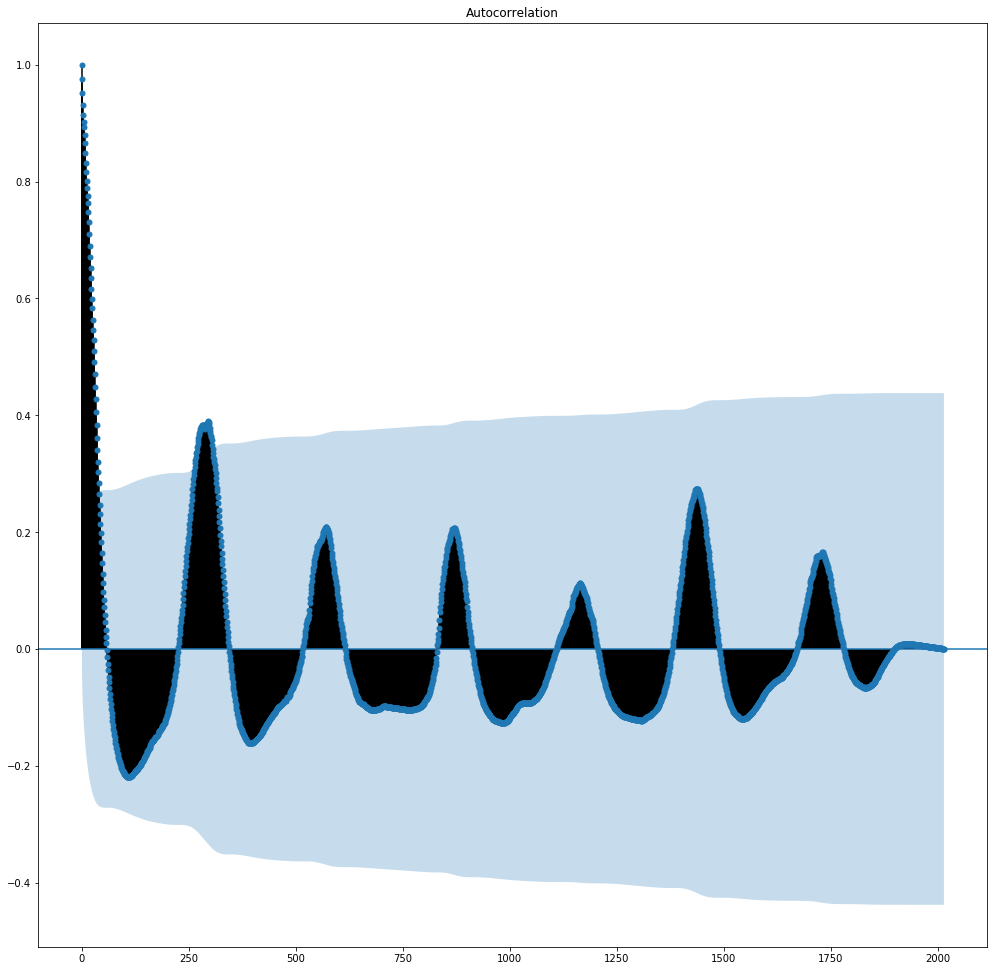

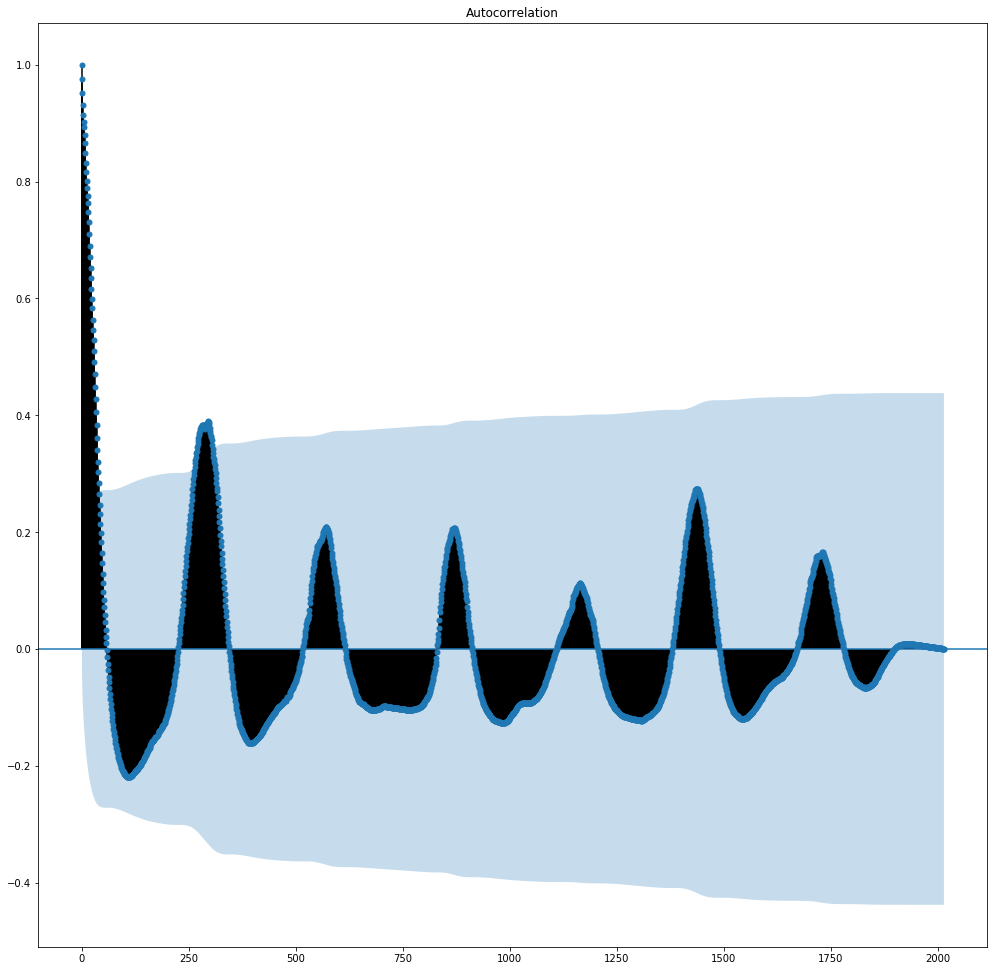

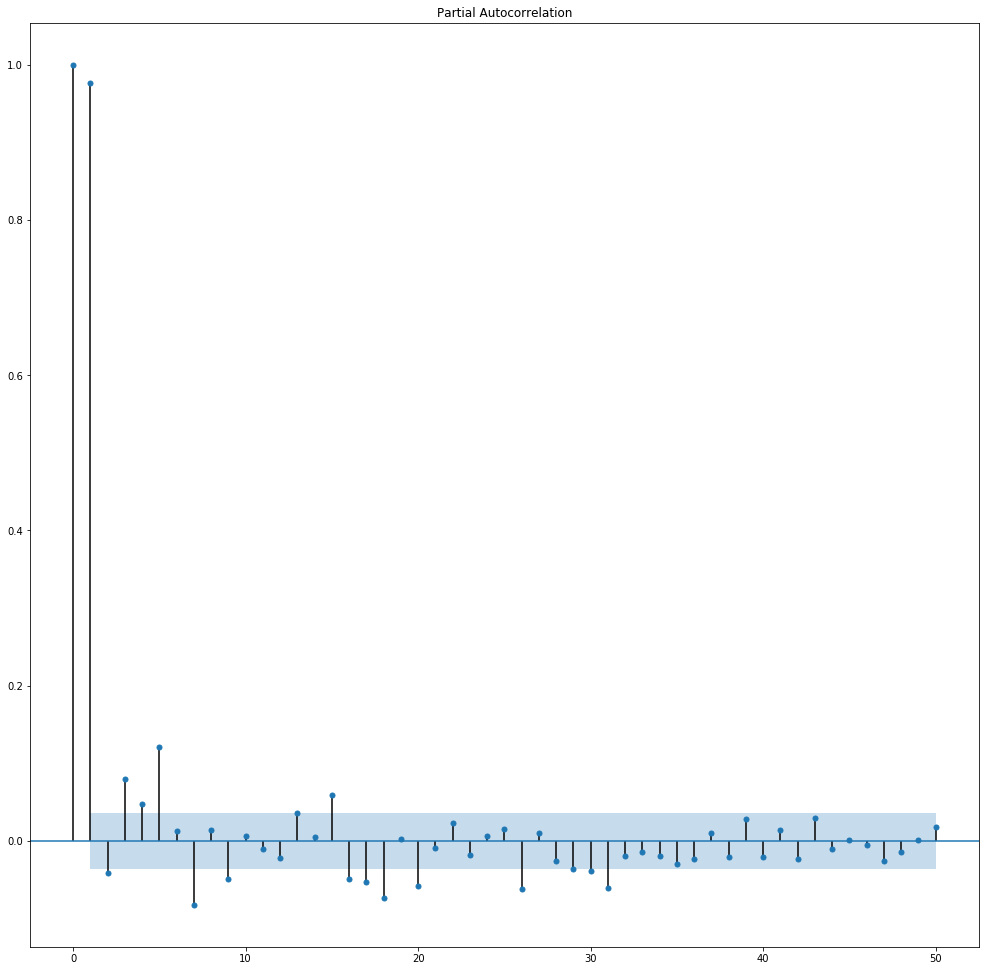

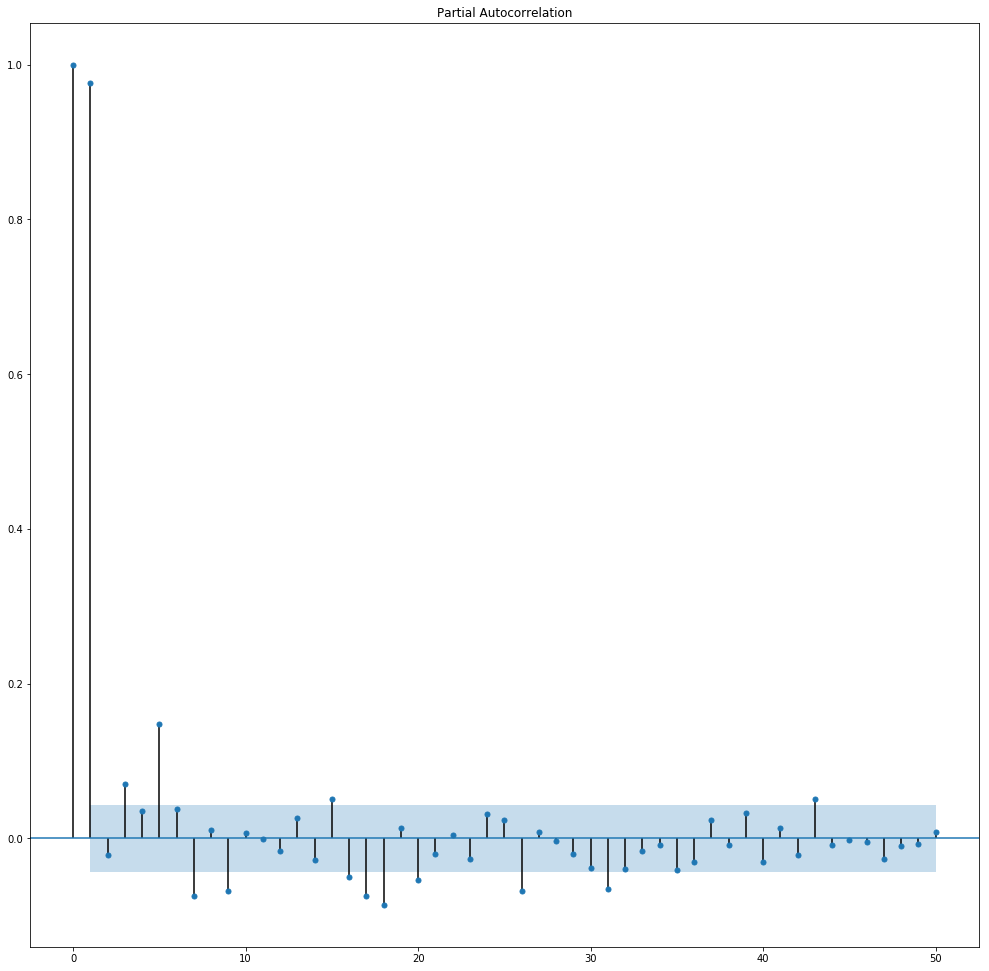

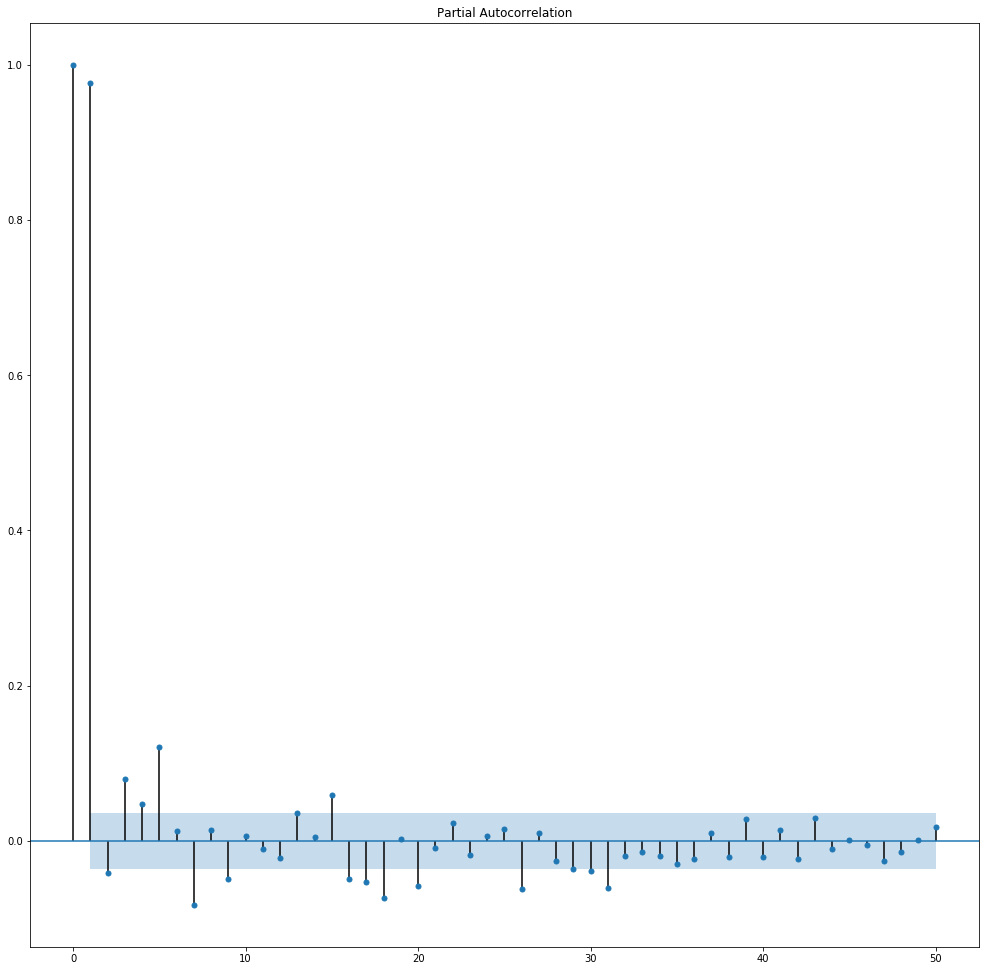

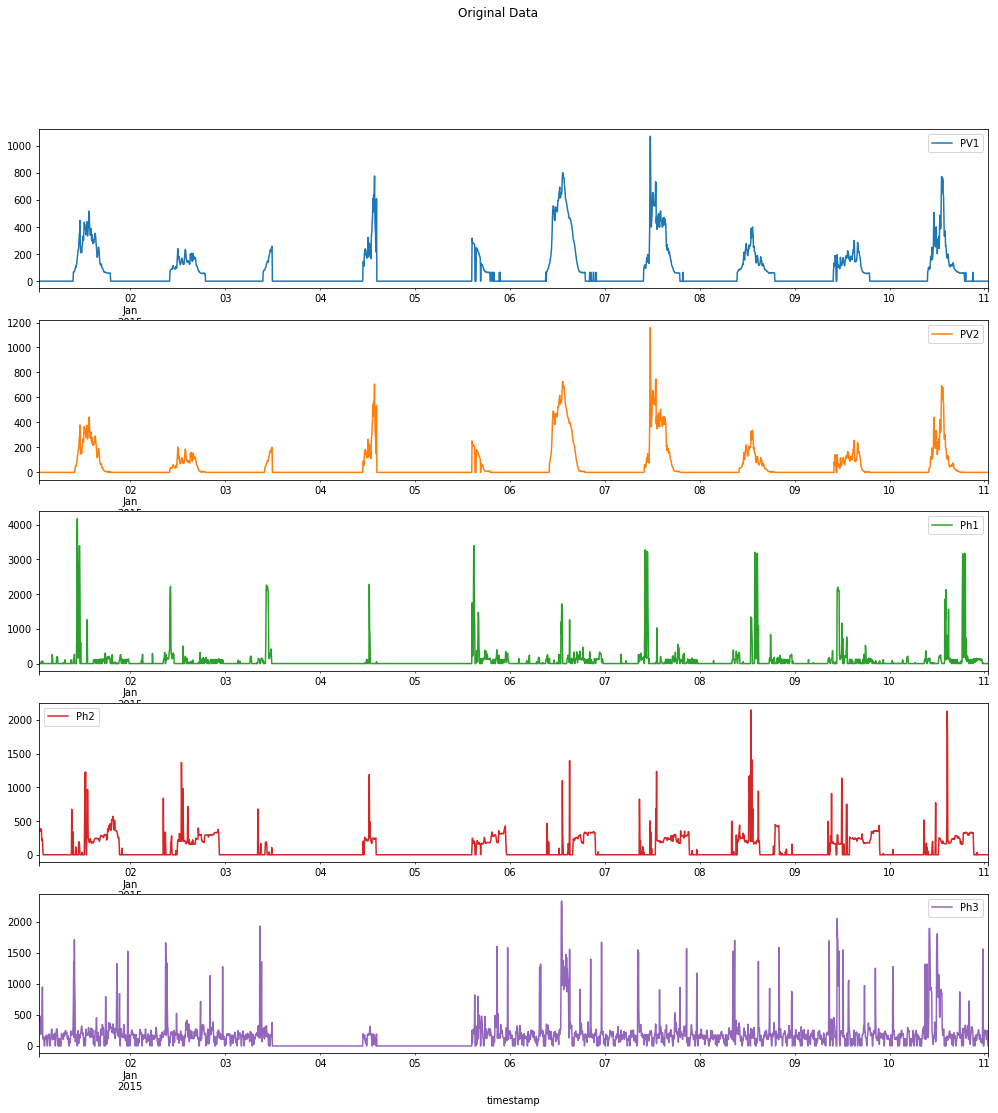

In [20]:
ax = series.iloc[0:days_to_num(10)].plot(subplots=True, sharex=False, title='Original Data', legend='False')
pyplot.show()

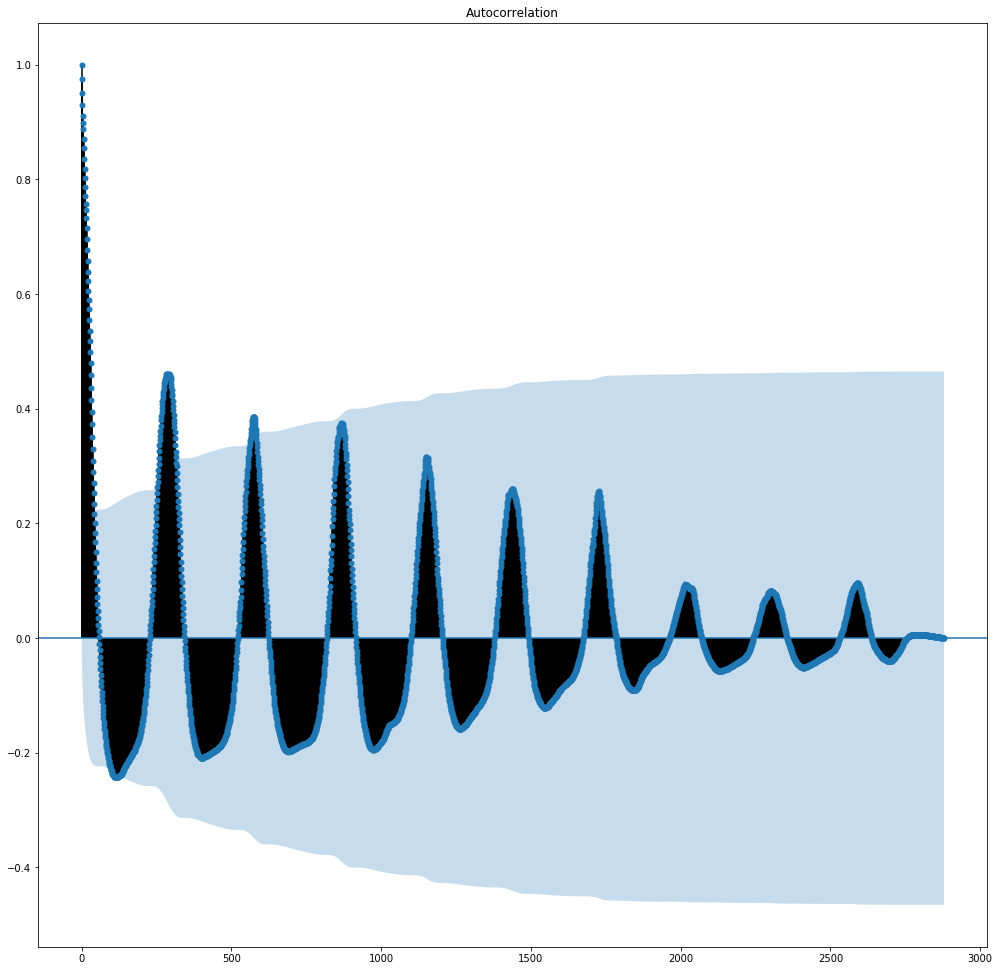

In [21]:
plot_acf(series['PV1'].iloc[0:days_to_num(10)])

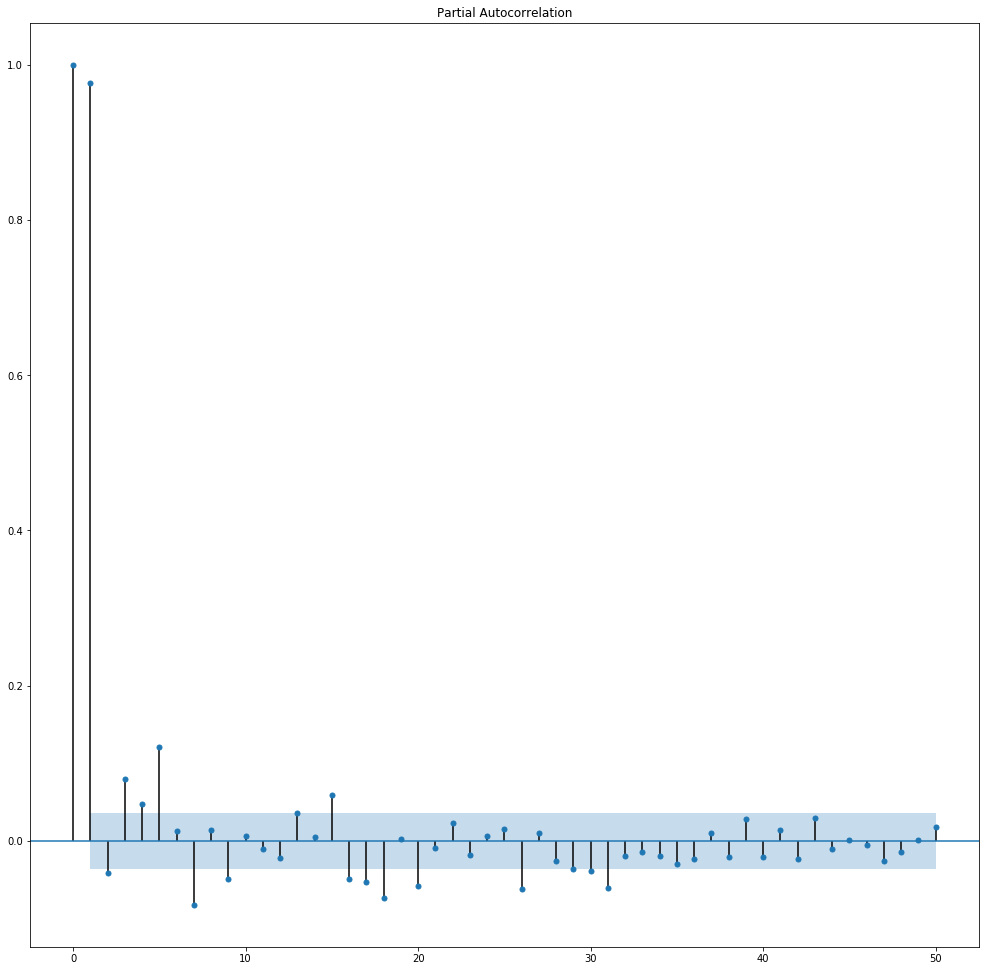

In [22]:
plot_pacf(series['PV1'].iloc[0:days_to_num(10)], lags=50)

                             ARIMA Model Results                              
Dep. Variable:                  D.PV1   No. Observations:                 2879
Model:                 ARIMA(3, 1, 1)   Log Likelihood              -13903.691
Method:                       css-mle   S.D. of innovations             30.277
Date:                Thu, 30 Nov 2017   AIC                          27819.382
Time:                        11:39:29   BIC                          27855.173
Sample:                    01-01-2015   HQIC                         27832.283
                         - 01-11-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.461e-06      0.443   2.14e-05      1.000      -0.869       0.869
ar.L1.D.PV1     0.5536      0.086      6.405      0.000       0.384       0.723
ar.L2.D.PV1    -0.1063      0.021     -4.972    

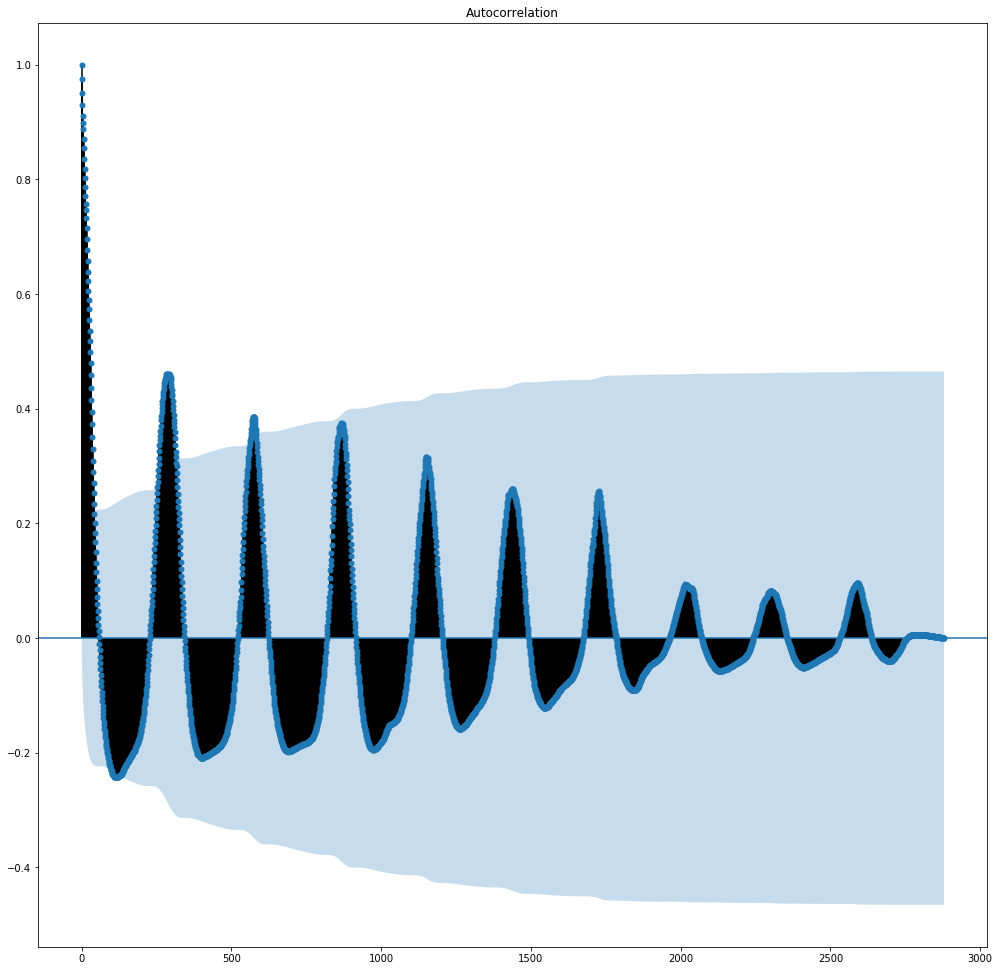

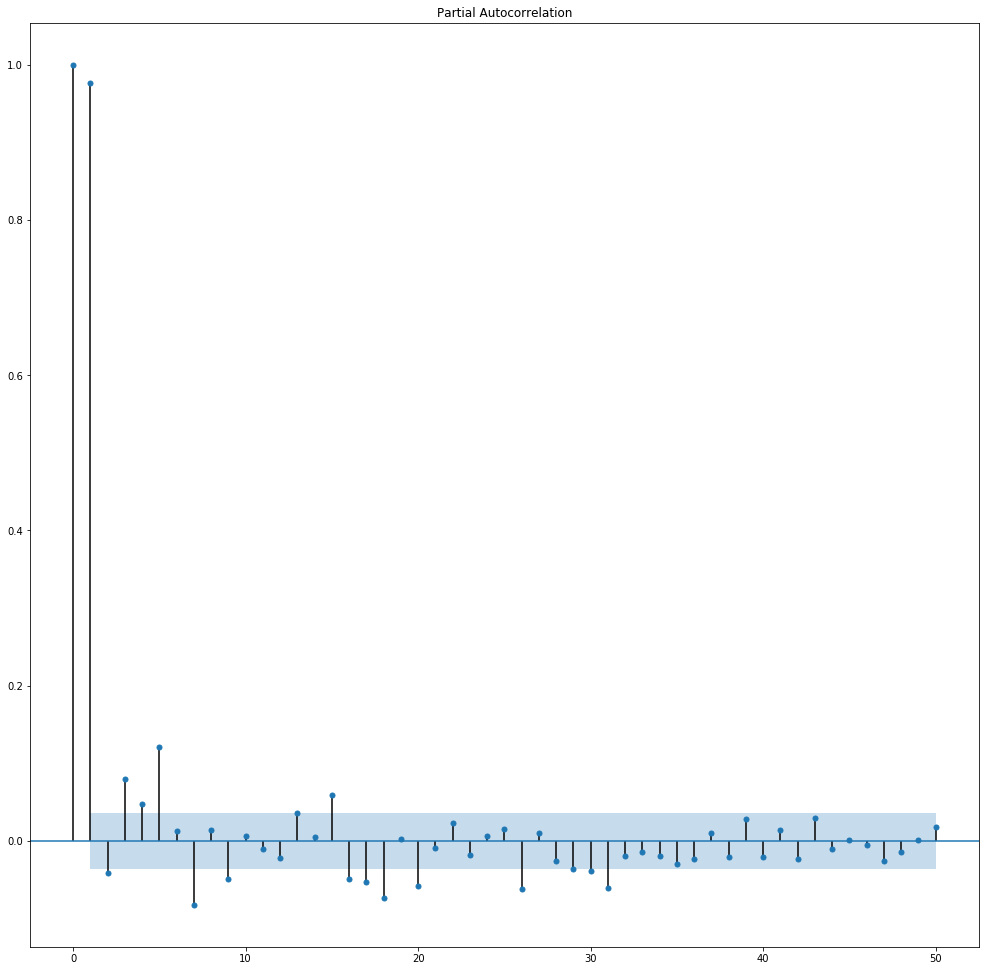

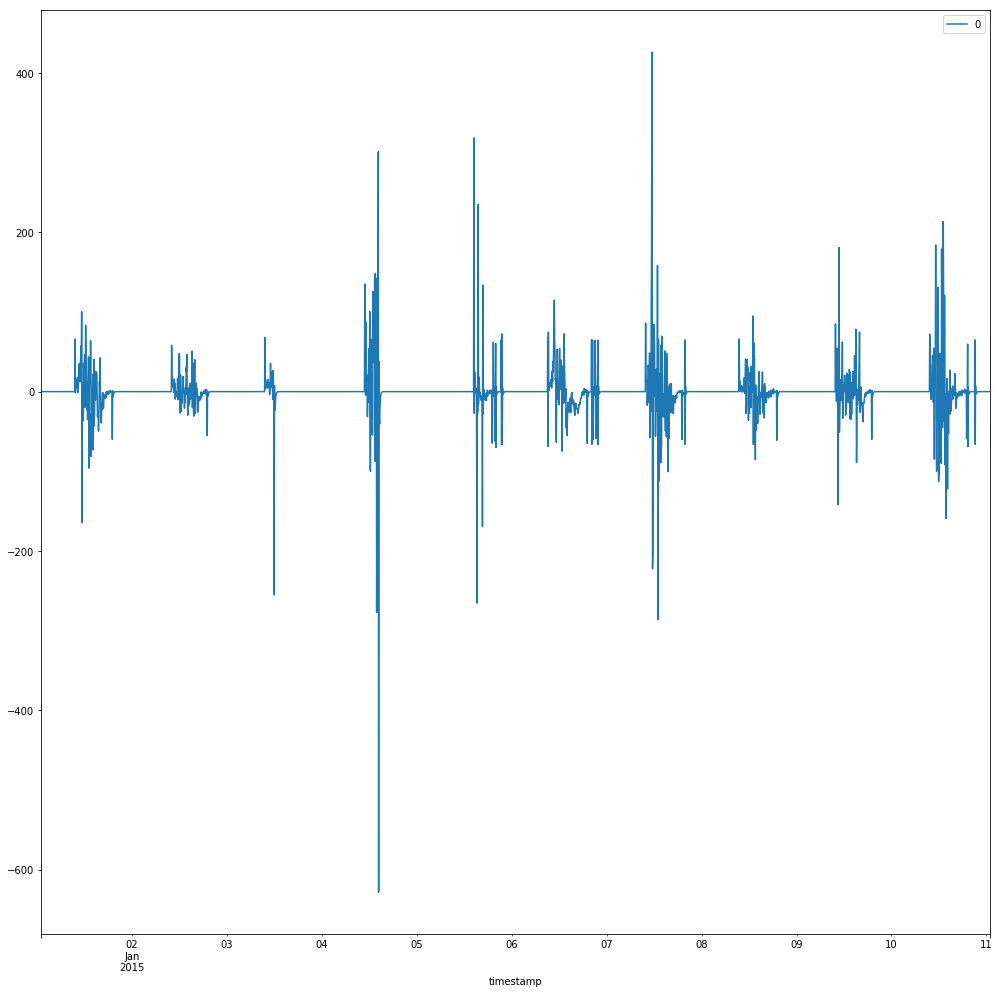

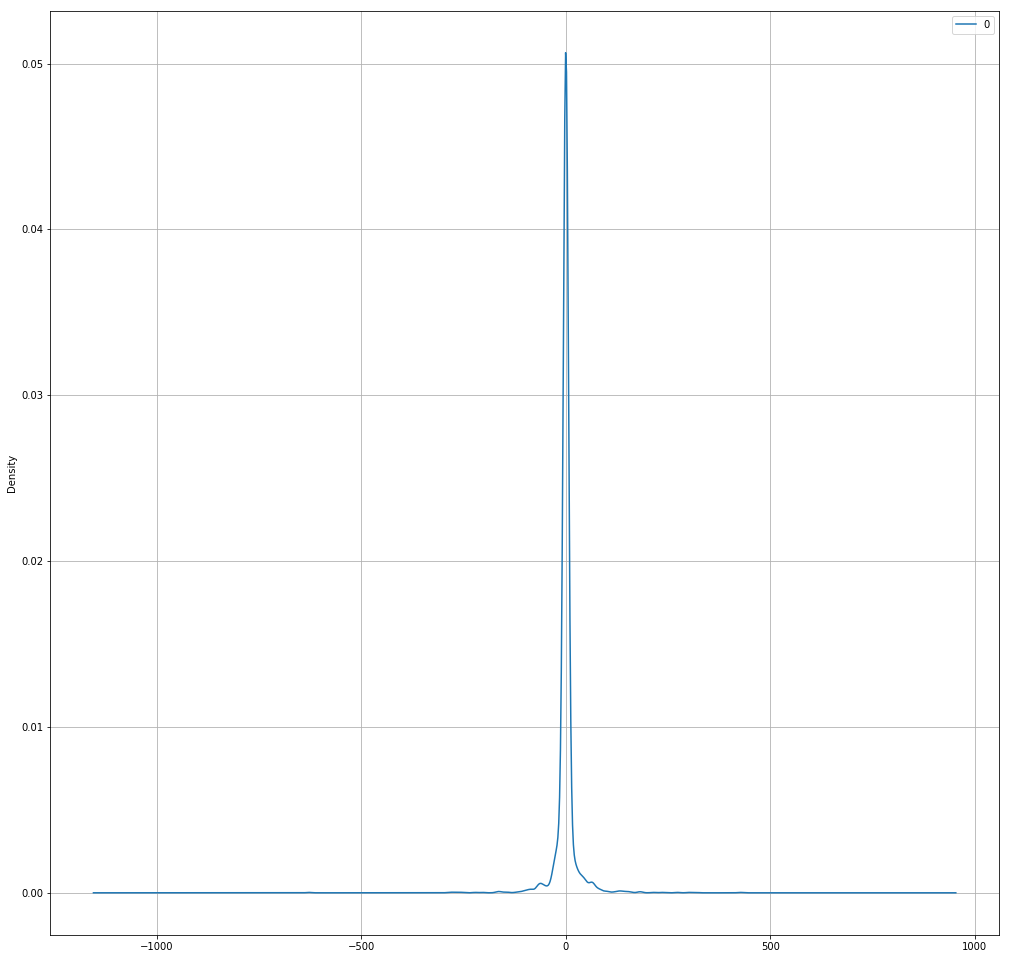

                 0
count  2879.000000
mean     -0.000012
std      30.282594
min    -628.305655
25%      -0.003648
50%      -0.000012
75%      -0.000012
max     426.186553


In [24]:
# fit model
model = ARIMA(series['PV1'].iloc[0:days_to_num(10)], order=(3,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

ax = residuals.plot(kind='kde')
ax.grid(True)
pyplot.show()
print(residuals.describe())

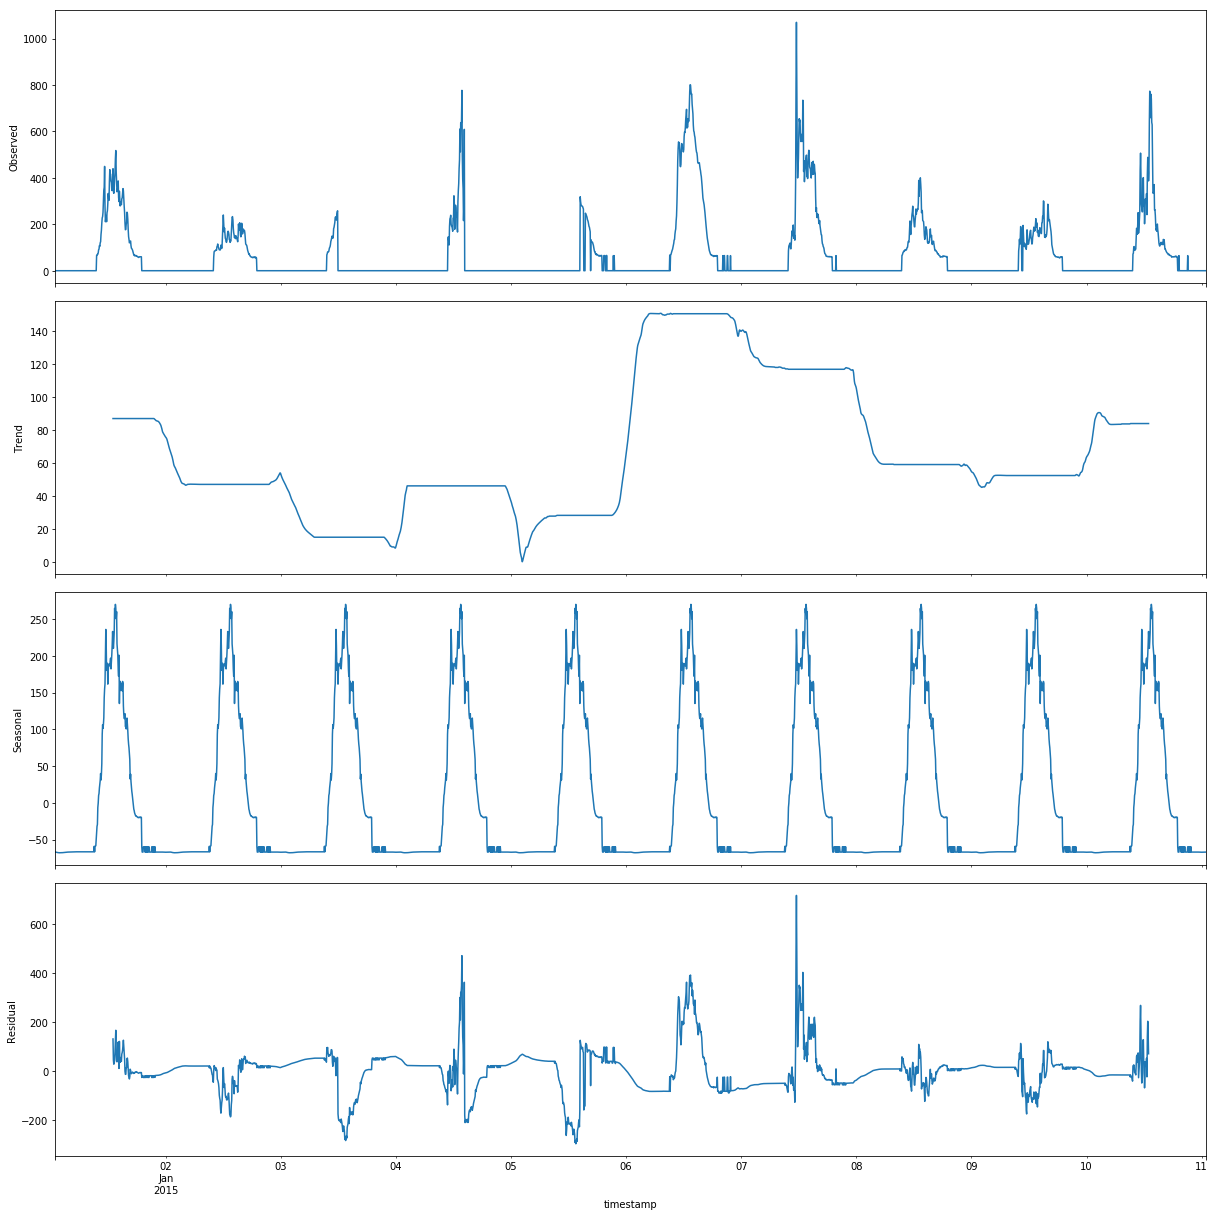

In [25]:
decomposition = seasonal_decompose(series['PV1'].iloc[0:days_to_num(10)], freq=days_to_num(1))  
decomposition.plot() 

In [26]:
# fit model
s_model = SARIMAX(series['PV1'].iloc[0:days_to_num(10)], order=(3,1,1), seasonal_order=(2, 0, 0, 288))
s_model_fit = s_model.fit(disp=0)
print(s_model_fit.summary())

# plot residual errors
s_residuals = DataFrame(s_model_fit.resid)
s_residuals.plot()
pyplot.show()

ax = s_residuals.plot(kind='kde')
ax.grid(True)
pyplot.show()
print(s_residuals.describe())

MemoryError: 

In [41]:
#series.index = series.index + DateOffset(years=-14, months=3)

In [42]:
#series.index

In [43]:
#series.iloc[:days_to_num(7)].to_csv('paul.csv', columns=['PV1'], header=False)